In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [ ]:
import sys

import random
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import cv2
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-5.10.133+-x86_64-with-glibc2.27
Tensor Flow Version: 2.9.2
Keras Version: 2.9.0

Python 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
Pandas 1.3.5
Scikit-Learn 1.0.2
GPU is available


In [ ]:
x_data = []
y_data = []
for i in os.listdir("data/val_256/val_256"):
    img = cv2.imread("data/val_256/val_256/" + i)
    y_data.append(img)
    cropped_img = img[64:192, 64:192]
    temp_img = np.zeros((256,256,3),dtype = int)
    for i in range(3):
        temp_img[:,:,i] = np.pad(cropped_img[:,:,i],((64,64),(64,64)),'constant', constant_values = (100))
    x_data.append(temp_img)
    if(len(x_data) == 15000):
      break

In [ ]:
len(x_data), len(y_data)

(15000, 15000)

In [ ]:
# Making Batches
train_dataset = []
for i in range(150): 
    temp = []
    for j in range(100):
        temp.append(np.reshape((x_data[(i * 100) + j]), (3, 256, 256)) / 128 - 1)
        if((j+1)%25 == 0):
            print("=", end="")
    train_dataset.append(tf.convert_to_tensor(temp, dtype = tf.float32))
    
    if((i + 1) % 15 == 0):
      print(i + 1, end = "\n")
    elif((i + 1) % 5 == 0):
      print(i + 1, end = "")

====================5====================10====================15
====================20====================25====================30
====================35====================40====================45
====================50====================55====================60
====================65====================70====================75
====================80====================85====================90
====================95====================100====================105
====================110====================115====================120
====================125====================130====================135
====================140====================145====================150


In [ ]:
dataset = []
for i in range(150): 
    temp = []
    for j in range(100):
        temp.append(np.reshape((y_data[(i * 100) + j]), (3, 256, 256)) / 128 - 1)
        if((j+1)%25 == 0):
            print("=", end="")
    dataset.append(tf.convert_to_tensor(temp, dtype = tf.float32))
    if((i + 1) % 15 == 0):
      print(i + 1, end = "\n")
    elif((i + 1) % 5 == 0):
      print(i + 1, end = "")

====================5====================10====================15
====================20====================25====================30
====================35====================40====================45
====================50====================55====================60
====================65====================70====================75
====================80====================85====================90
====================95====================100====================105
====================110====================115====================120
====================125====================130====================135
====================140====================145====================150


In [ ]:
def generator(): 
    model = tf.keras.Sequential() 
    model.add(Conv2D(256, 3,strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    model.add(Conv2DTranspose(512, 3, strides = (2 ,2),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    model.add(Conv2DTranspose(512, 3, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
    model.add(Conv2D(512, 2, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(Conv2D(512, 2, strides = (2, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(Conv2D(256, 3, strides=(1, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.build((None, 3, 256, 256))
    
    return model

In [ ]:
generator = generator()
generator.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 3, 256, 256)       590080    
                                                                 
 batch_normalization_208 (Ba  (None, 3, 256, 256)      1024      
 tchNormalization)                                               
                                                                 
 leaky_re_lu_216 (LeakyReLU)  (None, 3, 256, 256)      0         
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 3, 256, 256)      0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_87 (Conv2D  (None, 6, 512, 512)      1180160   
 Transpose)                                                      
                                                     

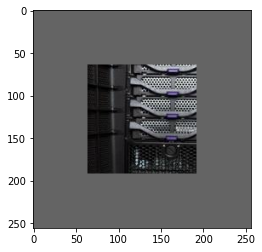

In [ ]:
img = np.array(x_data[11], dtype=np.float32)
plt.imshow(img.astype(np.uint8))

4.919874


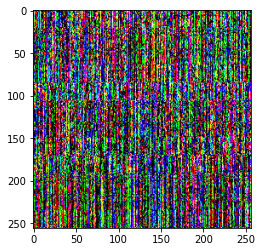

In [ ]:
img = np.reshape(img, (1, 3, 256, 256))
img = (img / 128) - 1
generated_image = generator(img, training = True)
print(np.amax(generated_image))
generated_image = np.reshape(generated_image, (256, 256, 3))
plt.imshow(generated_image)

In [ ]:
def discriminator():
    model = tf.keras.Sequential()
    model.add(Conv2D(256, 3,strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, 4, strides = (2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, 4, strides = (2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(32, 2, strides = (2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    model.build((None, 3, 256, 256))

    return model

In [ ]:
discriminator = discriminator()
discriminator.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 3, 256, 256)       590080    
                                                                 
 leaky_re_lu_222 (LeakyReLU)  (None, 3, 256, 256)      0         
                                                                 
 dropout_8 (Dropout)         (None, 3, 256, 256)       0         
                                                                 
 conv2d_134 (Conv2D)         (None, 2, 128, 128)       524416    
                                                                 
 leaky_re_lu_223 (LeakyReLU)  (None, 2, 128, 128)      0         
                                                                 
 dropout_9 (Dropout)         (None, 2, 128, 128)       0         
                                                                 
 conv2d_135 (Conv2D)         (None, 1, 64, 64)       

In [ ]:
decision = discriminator(np.reshape(generated_image, (1, 3, 256, 256)))
print (decision)

tf.Tensor([[-0.27633604]], shape=(1, 1), dtype=float32)


In [ ]:
mse = tf.keras.losses.MeanSquaredError()
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True,)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
  
def generator_loss(real_output, fake_output):
    return cross_entropy(real_output, fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = 'output/dcgan1/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 500
batch_size = 32

In [ ]:
temp = []
for j in range(100):
    temp.append(np.reshape((x_data[random.randint(0, 10000)]), (3, 256, 256)) / 255)
    if((j+1)%25 == 0):
        print("=", end="")
seed = tf.convert_to_tensor(temp, dtype = tf.float32)

====

In [ ]:
@tf.function
def train_step(images, i):
    noise = train_dataset[i]

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(generated_images, images)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
from IPython.display import clear_output
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        count = 0
        for image_batch in dataset:
            train_step(image_batch, count)
            count += 1

        # Produce images for the GIF as you go
        clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 50 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(10, 10))

    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(np.reshape(predictions[i] * 255, (256, 256, 3)).astype(np.uint8))
        plt.axis('off')
    if((epoch + 1) % 25 == 0):
      plt.savefig('output/dcgan1/image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

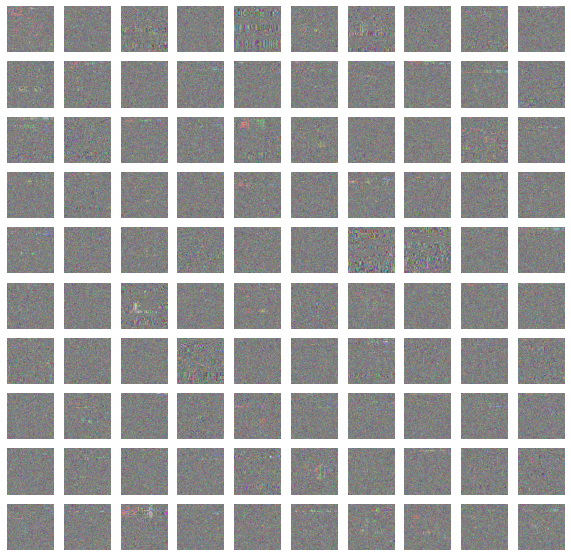

Time for epoch 356 is 28.45849847793579 sec


KeyboardInterrupt: ignored

In [ ]:
train(dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('output/dcgan1/image_at_epoch_{:04d}.png'.format(epoch_no))

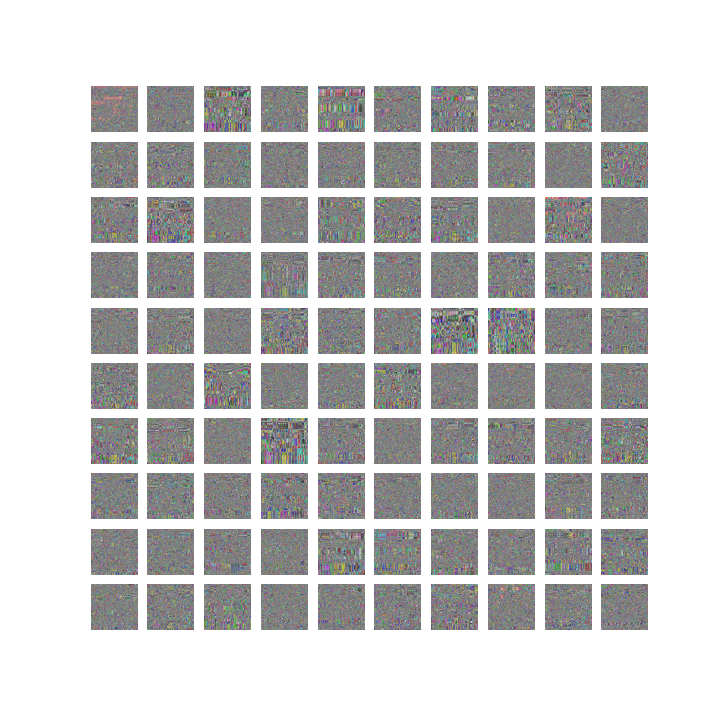

In [ ]:
display_image(99)

In [ ]:
import glob
import imageio
anim_file = 'output/dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('output/dcgan1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


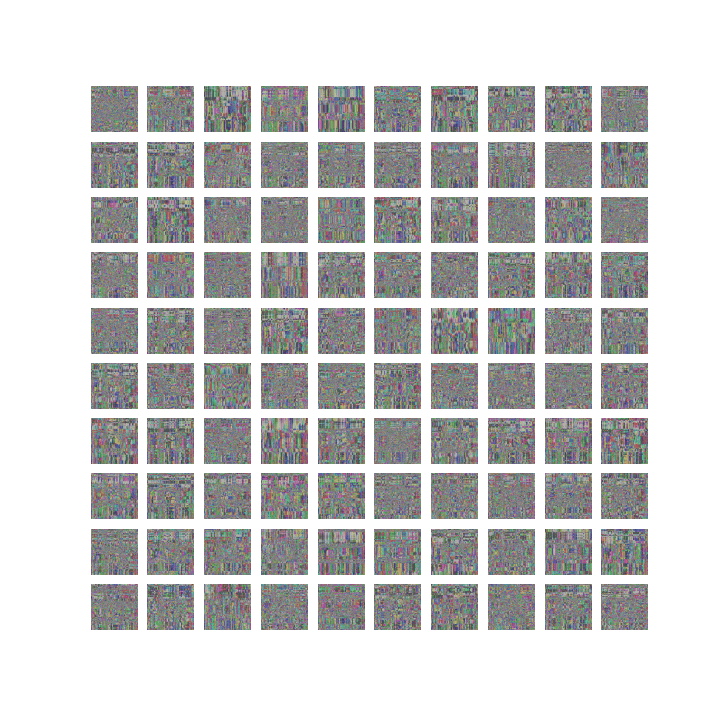

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file('output/dcgan1/dcgan.gif')

In [ ]:
# !zip -r "/content/outputs.zip" "/content/Outputs"

In [ ]:
# !zip -r "/content/cp.zip" "/content/training_checkpoints"

In [ ]:
# from google.colab import files
# files.download('/content/outputs.zip') 
# files.download('/content/cp.zip') 
# files.download('/content/dcgan.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>